# Life Expectancy and GDP
Written by TheJJSerg, Sug900, Fernando, and CalvinTheMechanic

This is a Codecademy Portfolio Project to use data visualization to analyze and plot data from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

We will analyze, prepare, and plot data in order to answer questions in a meaningful way. After our analysis, we will be creating a blog post to share our findings on the World Health Organization website.

## Project Objectives
- Complete a project to add to our portfolio
- Use `seaborn` and `Matplotlib` to create visualizations
- Become familiar with presenting and sharing data visualizations
- Preprocess, explore, and analyze data

## Overview of the Data
The dataset, `all_data.csv`, contains the following columns:
- **Country**: nation for a specific observation
- **Year**: the year for the observation
- **Life expectancy at birth (years)**: the life expectancy value in years
- **GDP**: Gross Domestic Product in U.S. dollars

## Method and Analysis
1. Data Loading and Tiding
2. Data Analsyis
3. Data Visualization
4. Others

1. Data Loading and Tiding

In [ ]:
#import libraries for the analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

#read csv file into a dataframe
gdp_data = pd.read_csv('all_data.csv')

#print the first 5 rows
print('HEAD OF THE DATAFRAME:')
print('======================')
print(gdp_data.head(),"\n")

#print the info of the df and main stats of the variables
print('INFORMATION ABOUT THE DATAFRAME VARIABLE TYPES & NON-NULL COUNTS:')
print('=================================================================')
print(gdp_data.info(), "\n")
print('DESCRIPTION ABOUT THE DATA:')
print('===========================')
print(gdp_data.describe(include='all'), "\n")

# Analyzing unique values in Country and Year variables
print('INFORMATION ABOUT THE COUNTRY AND YEARS:')
print('=================================================================')
print(f'Unique Value of Country: {gdp_data.Country.unique()}')
print(f'Unique Value of Year: {gdp_data.Year.unique()}', "\n")

# Reduce the large name of United States of America.
gdp_data.loc[gdp_data['Country'] == 'United States of America', 'Country'] = 'USA'

#reduce life expectancy variable name
gdp_data.rename(columns={'Life expectancy at birth (years)': 'Life'}, inplace=True)

# Escale of variable GDP in Billions
gdp_data['GDP'] = (gdp_data['GDP'] / 1e9).round(2)

print('DATAFRAME RENAMED AND TRANSFORMED:')
print('==================================')
print(gdp_data.head())


HEAD OF THE DATAFRAME:
  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10 

INFORMATION ABOUT THE DATAFRAME VARIABLE TYPES & NON-NULL COUNTS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memor

* The data contains 96 entries with no null values
* The data types are correct as the `Country` variable is a string while the `Life expectancy at birth (years)` and `GDP` are float. The `Year` variable is an integer
* The countries present in the data are: Chile, China, Germany, Mexico, United States of America and Zimbabwe.
* The data were collected between the years 2000 and 2015.
* The data shows no issues with missing data or wrong entries 
* The `Life expectancy at birth (years)` variable was renamed to `Life`
* The `Country` 'United States of America' was rename to USA
* The `GDP` values were scaled to billions to improve interpretation and visualization.

### 2. Exploratory Data Analysis

**Trends**

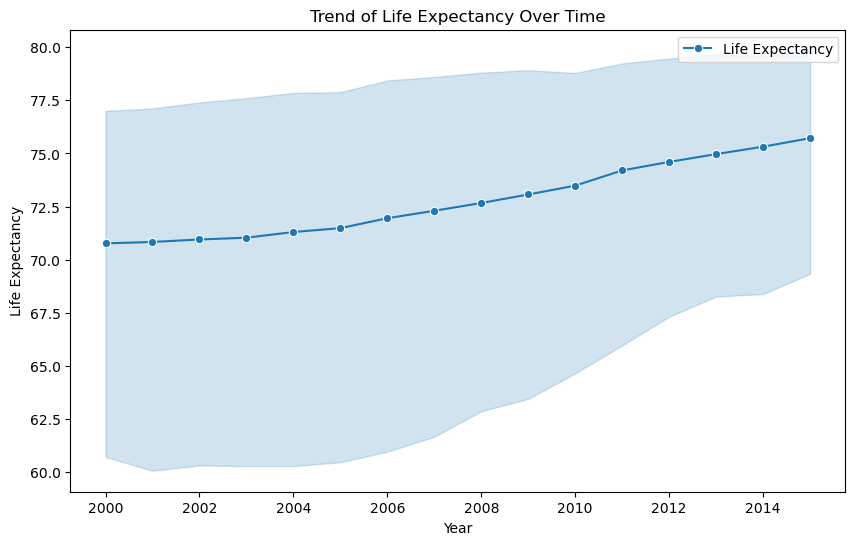

In [9]:
# Trend of Life Expectancy Over Time
plt.figure(figsize=(10, 6))
sn.lineplot(x="Year", y="Life", data=gdp_data, marker='o', label='Life Expectancy')
plt.title('Trend of Life Expectancy Over Time')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend()
plt.show()

The trend line is positive and shows that there is a constant growth in life expectancy over the analyzed period, suggesting that there are no significant changes in the countries analyzed.
* The range decreases over time which shows that one or several countries have an overall increase in life expectancies. This is especially shown after the year 2006..

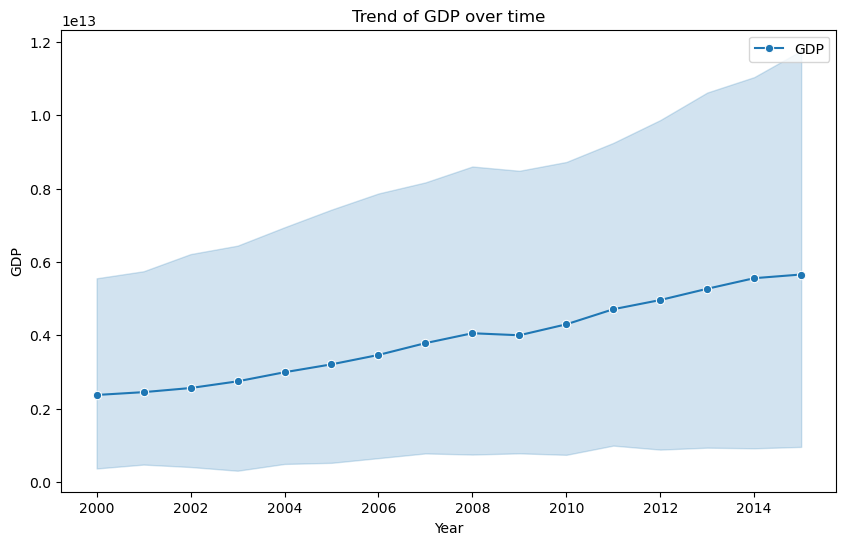

In [14]:
# Trend of GDP over time
plt.figure(figsize=(10, 6))
sn.lineplot(x="Year", y="GDP", data=gdp_data, marker='o', label='GDP')
plt.title('Trend of GDP over time')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.show()

The GDP trend also shows growth. The growth is generally constant, but there is a slight decrease in GDP from 2008 to 2009.
* It would be interesting to analyze what caused the GDP decrease in 2008 in this group.
* The upper band grows significantly at the end of the period due to an increase in GDP in one or several countries.

**Grouping the variables by Countries** 

In [33]:
# grouping by country
data_grouped = gdp_data.groupby('Country').mean().reset_index()
data_grouped

,Country,Year,Life,GDP
0,Chile,2007.5,78.94375,1.697888e+11
1,China,2007.5,74.26250,4.957714e+12
2,Germany,2007.5,79.65625,3.094776e+12
3,Mexico,2007.5,75.71875,9.766506e+11
4,United States of America,2007.5,78.06250,1.407500e+13
5,Zimbabwe,2007.5,50.09375,9.062580e+09


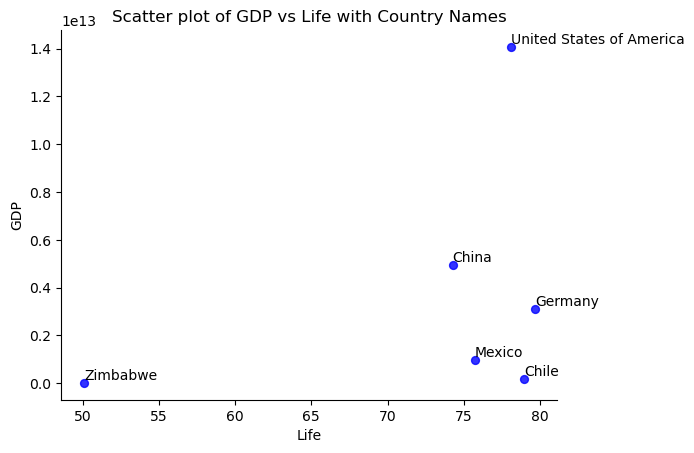

In [34]:
data_grouped.plot(kind='scatter', x='Life', y='GDP', s=32, alpha=.8, color='blue')

for index, row in data_grouped.iterrows():
    plt.text(row['Life'], row['GDP'], row['Country'], horizontalalignment='left', verticalalignment='bottom')

plt.gca().spines[['top', 'right']].set_visible(False)
plt.xlabel('Life')  
plt.ylabel('GDP')   
plt.title('Scatter plot of GDP vs Life with Country Names')  # Añade un título si es necesario
plt.show()

* There is a general trend where countries with a higher GDP also tend to have a higher life expectancy. However, there are exceptions, as can be observed with China, which, despite having a high GDP, does not have the highest life expectancy in the group.

* There is a significant difference in GDP among these countries. The United States, for example, has a much higher GDP than the other countries represented in the graph and not has the best life expectancy.

* Zimbabwe appears to be an outlier in terms of GDP, with a significantly lower value compared to other countries, although its life expectancy is not the lowest of the group, but this are means.

* While countries like Germany and the United States show high levels of GDP and life expectancy, suggesting a correlation between economic development and health, other countries, such as Mexico and Chile, have a relatively high life expectancy but a lower GDP in comparison.

**Calculate the growth ratio**

In the previous graph, we see that life expectancy does not have a direct relationship with GDP, but we can analyze which countries have made better use of this increase in GDP to use it in political and economic actions that increased their Life Expectancy.

In [ ]:
# Calculate the growth percentage using the first year as the base in relation to the last year and the ratio.
def calculate_growth(df):
    df.sort_values('Year', inplace=True)
    initial_life_expectancy = df['Life'].iloc[0]
    initial_GDP = df['GDP'].iloc[0]
    df['Life Growth (%)'] = (df['Life'] / initial_life_expectancy - 1) * 100
    df['GDP Growth (%)'] = (df['GDP'] / initial_GDP - 1) * 100
    df['Ratio'] = df['Life Growth (%)'] / df['GDP Growth (%)'].replace({0:1})
    return df

# group by country and apply the function.
growth_data = gdp_data.groupby('Country', group_keys=False).apply(calculate_growth)

# calculate cumulative growth.
final_growth_data = growth_data.groupby('Country', group_keys=False).nth(-1).reset_index()

# filter the columns
final_growth_percentages = final_growth_data[['Country', 'Life Growth (%)', 'GDP Growth (%)', 'Ratio']]

# print results.
final_growth_percentages.sort_values('Ratio', ascending=False).reset_index(drop=True)

,Country,Life Growth (%),GDP Growth (%),Ratio
0,Zimbabwe,31.956522,143.718552,0.222355
1,Germany,3.846154,73.112644,0.052606
2,United States of America,3.255208,75.728155,0.042985
3,Mexico,2.540107,68.545801,0.037057
4,Chile,4.139715,211.475850,0.019575
5,China,6.136681,813.418913,0.007544


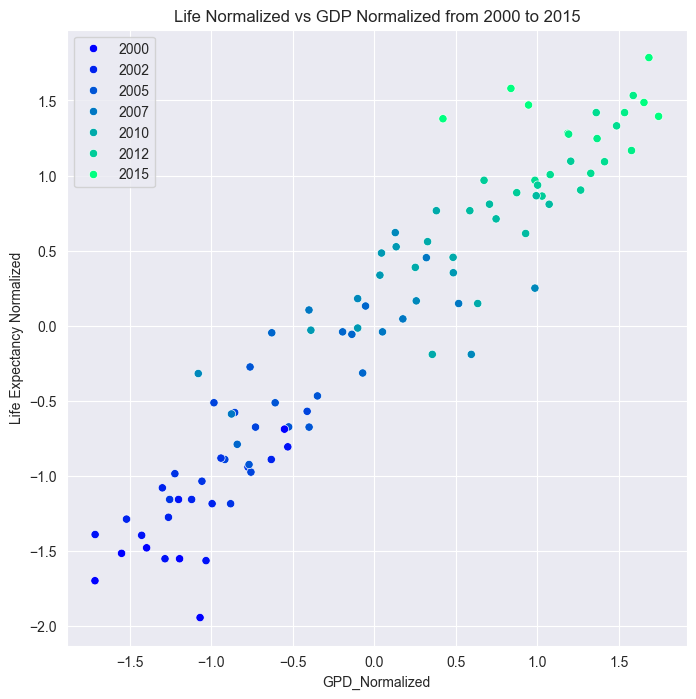

<Figure size 640x480 with 0 Axes>

In [26]:
#Create a normaliized GDP and Life variable per country

# Apply the lambda function to calculate GDP_Normalized
GDP_Norm = gdp_data.groupby('Country')['GDP'].apply(lambda x: (x - x.mean()) / x.std())
# reset the index
GDP_Norm = GDP_Inc.reset_index()
# merge the gdp inc to the dataframe
gdp_data['GDP_Norm'] = GDP_Norm['GDP']

#Apply the lambda function to calculate Life_Normalized
Life_Norm = gdp_data.groupby('Country')['Life'].apply(lambda x: (x - x.mean()) / x.std())
# reset the index
Life_Norm = Life_Norm.reset_index()
# merge the life inc to the dataframe
gdp_data['Life_Norm'] = Life_Norm['Life']

#plot the normalized GDP
plt.figure(figsize=(8,8))
sn.scatterplot(data=gdp_data, x='GDP_Norm', y='Life_Norm', hue='Year', palette='winter')
plt.xlabel('GPD_Normalized')
plt.ylabel('Life Expectancy Normalized')
plt.title('Life Normalized vs GDP Normalized from 2000 to 2015')
plt.legend(fontsize=10)
plt.show()
plt.clf()